In [215]:
#import required packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [216]:
#import data into lead_df
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns',None)

In [217]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [218]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [219]:
lead_df.shape

(9240, 37)

In [220]:
#Statistics of numeric features
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [221]:
#Calculate the percent of null values in each feature
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [222]:
#Encode the Yes/No features to 1/0

for labels in ['Do Not Email','Do Not Call','Magazine','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
               'A free copy of Mastering The Interview','Search']:
    lead_df[labels] = lead_df[labels].apply(lambda x : 1 if x == 'Yes' else 0)

In [223]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [224]:
#Replace Select with NaNs
lead_df = lead_df.replace('Select', np.nan)

In [225]:
#Recalculate null percentage after replacing Select with NaN
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [226]:
#dropping Columns with more that 70% missing values
lead_df.drop(['Lead Profile','How did you hear about X Education'],axis = 1,inplace = True)

In [227]:
#Replace nan with Not Sure for Lead Quality, as Lead Quality is one of the important features
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan,'Not Sure')

In [228]:
#dropping columns with more than 40% missing values
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis = 1)

In [229]:
#Replace nan in City with Not Provided
lead_df['City'] = lead_df['City'].replace(np.nan,"not provided")

In [230]:
lead_df.Tags.value_counts(normalize = True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [231]:
#Replace Tags with 'Will revert after reading the email' as 35% of data has the value
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [232]:
lead_df.Specialization.value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [233]:
#Replace NaNs with Not Provided as top three values are almost similar in count
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan,'not provided')

In [234]:
#Replacing NaNs with another category 'not provided' to avoid loosing a lot of data
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'not provided')

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'not provided')

lead_df['Country'] = lead_df['Country'].replace(np.nan, 'not provided')

In [235]:
lead_df['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
China                      2
Bangladesh                 2
Belgium                    2
Philippines                2
Italy                      2
Netherlands                2
Uganda                     2
Vietnam                    1
Kenya                      1
Liberia                    1
Indonesia                  1
Switzerland                1
Russia        

In [236]:
#We can see that a majority of values have India as Country and Other values can be clubbed together
def places(x):
    country = ""
    if x == "India":
        country = "India"
    elif x == "not provided":
        country = "not provided"
    else:
        country = "other than India"
    return country

lead_df['Country'] = lead_df.apply(lambda x:places(x['Country']), axis = 1)
lead_df['Country'].value_counts()

India               6492
not provided        2461
other than India     287
Name: Country, dtype: int64

In [237]:
#dropping remaining rows with Nulls
lead_df.dropna(axis = 0,inplace = True)

In [238]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,not provided,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,not provided,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [239]:
lead_df.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [240]:
#We can observe that following features just have a single value and thus will not add any information to the model, thus we can drop
lead_df1= lead_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [241]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [242]:
# We can also drop the indexes in the dataset as it wil add no information to our model
lead_df_final = lead_df1.drop(['Prospect ID','Lead Number'],axis = 1)

In [243]:
lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [244]:
#We have handled the missing value successfully, we can proceed with EDA
round(lead_df_final.isnull().sum()/lead_df_final.shape[0],2)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

## Exploratory Data Analysis

In [245]:
lead_df_final.Converted.value_counts(normalize = True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

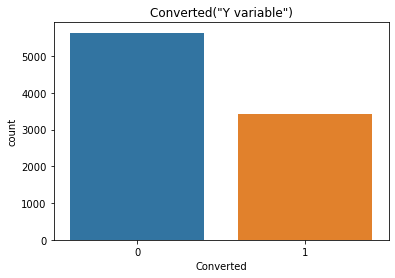

In [246]:
sns.countplot(lead_df_final['Converted'])
plt.title('Converted("Y variable")')
plt.show()

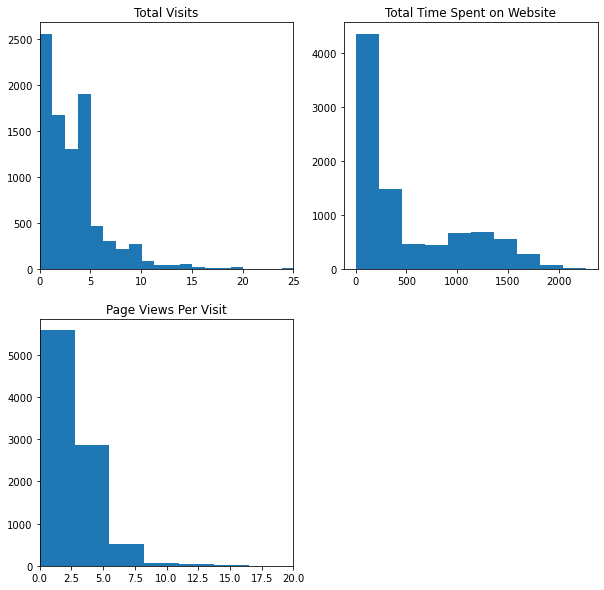

In [247]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

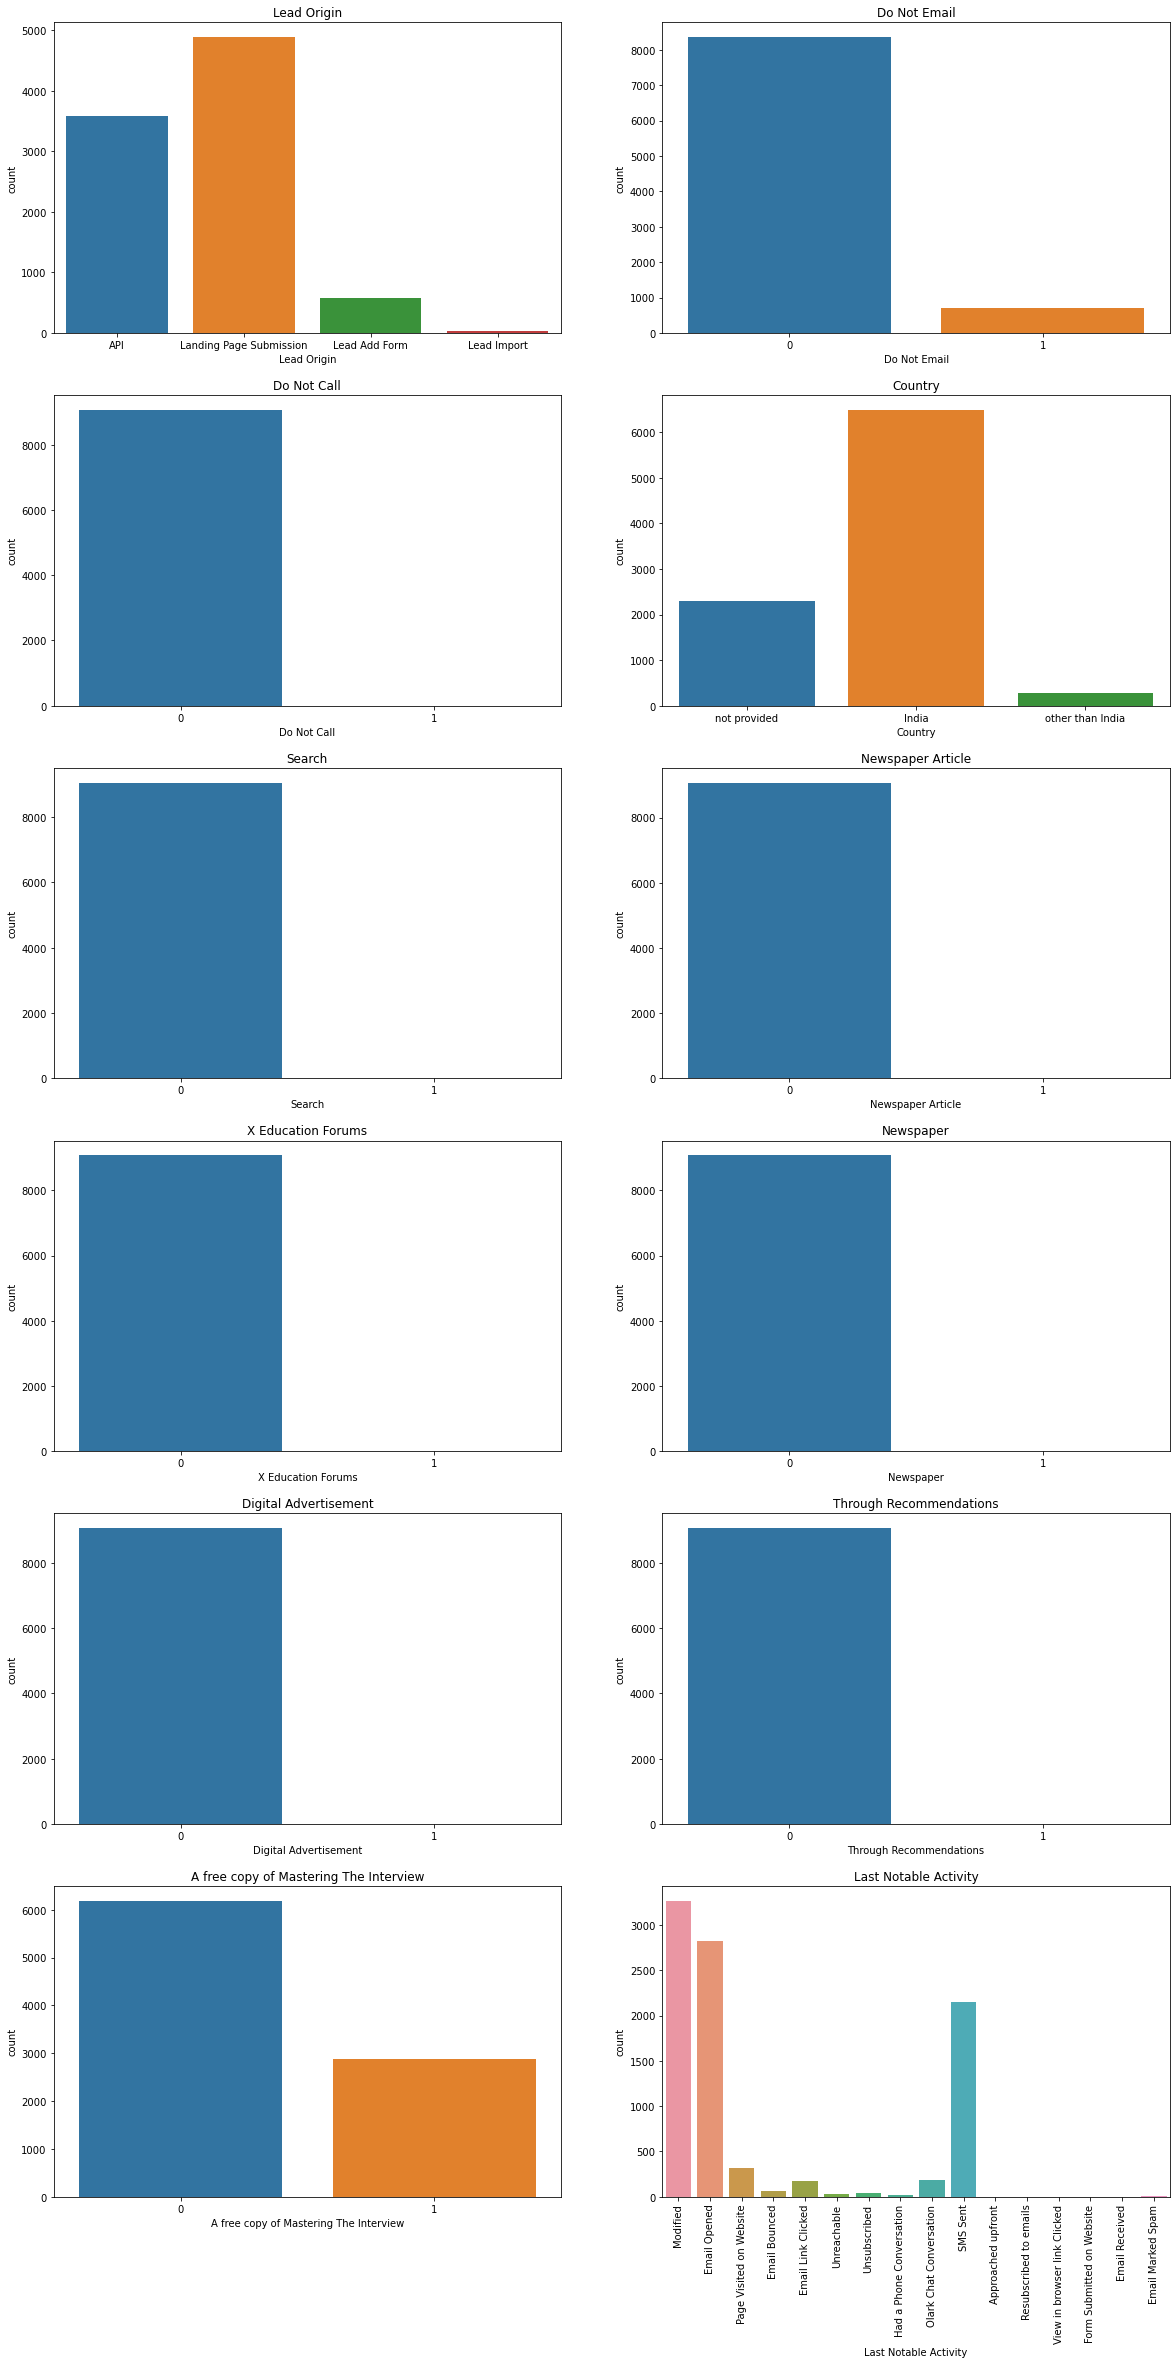

In [248]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

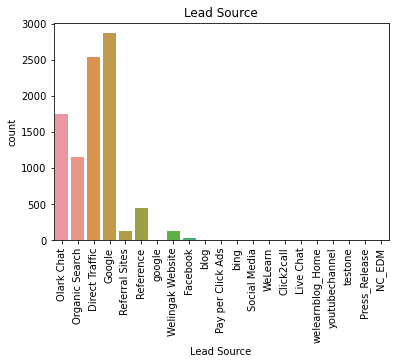

In [249]:
sns.countplot(lead_df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

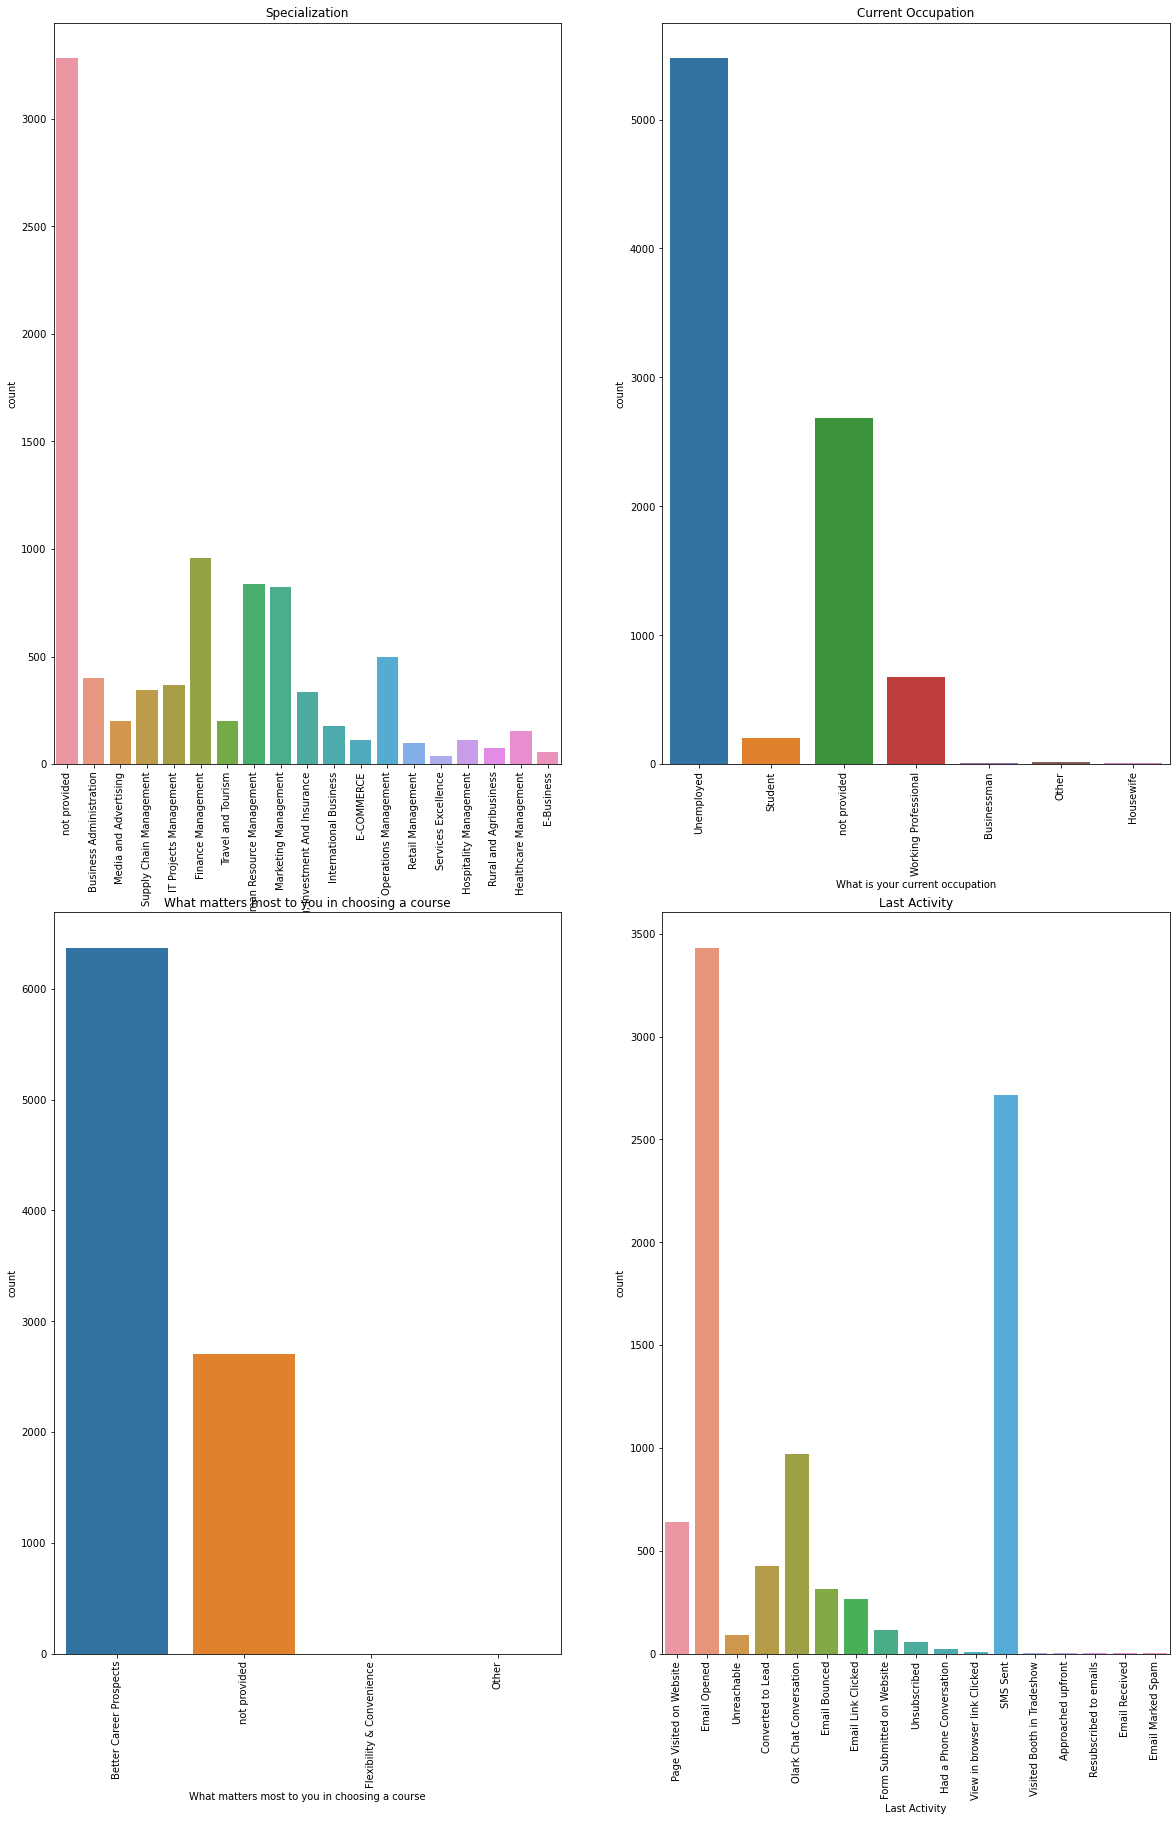

In [250]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(lead_df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead_df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(lead_df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(lead_df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [251]:
lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

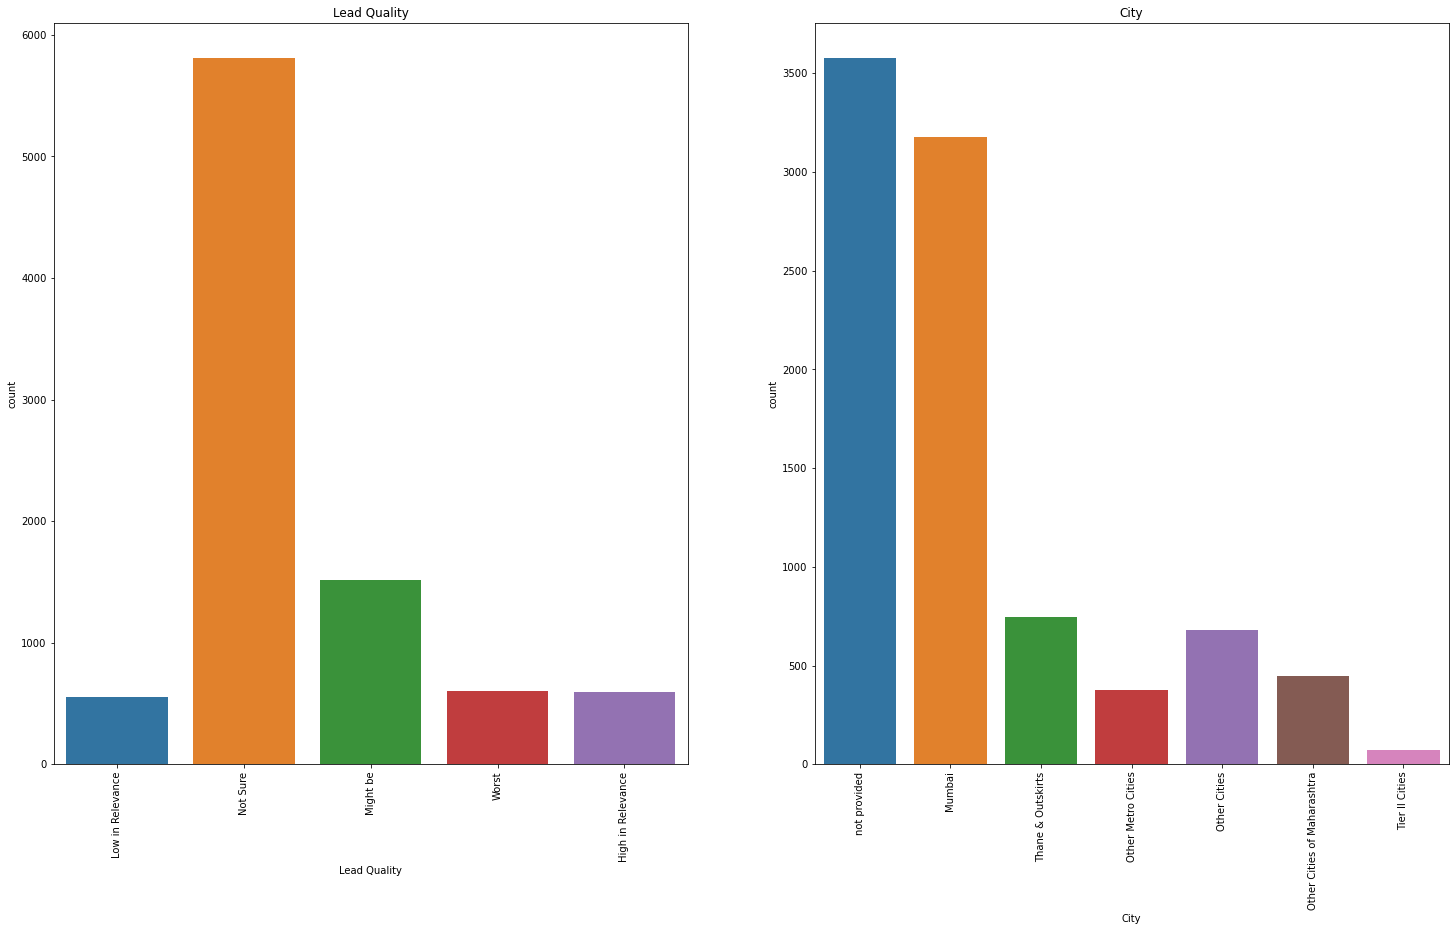

In [252]:
plt.figure(figsize = (25,30))
plt.subplot(2,2,1)

sns.countplot(lead_df_final['Lead Quality']).tick_params(axis='x', rotation = 90)
plt.title('Lead Quality')
plt.subplot(2,2,2)
sns.countplot(lead_df_final['City']).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.show()

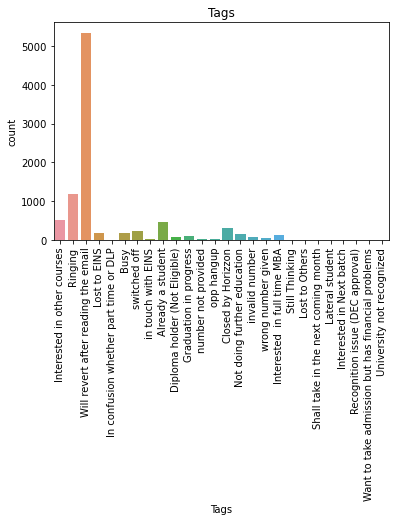

In [253]:
sns.countplot(lead_df_final['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show()

In [254]:
lead_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

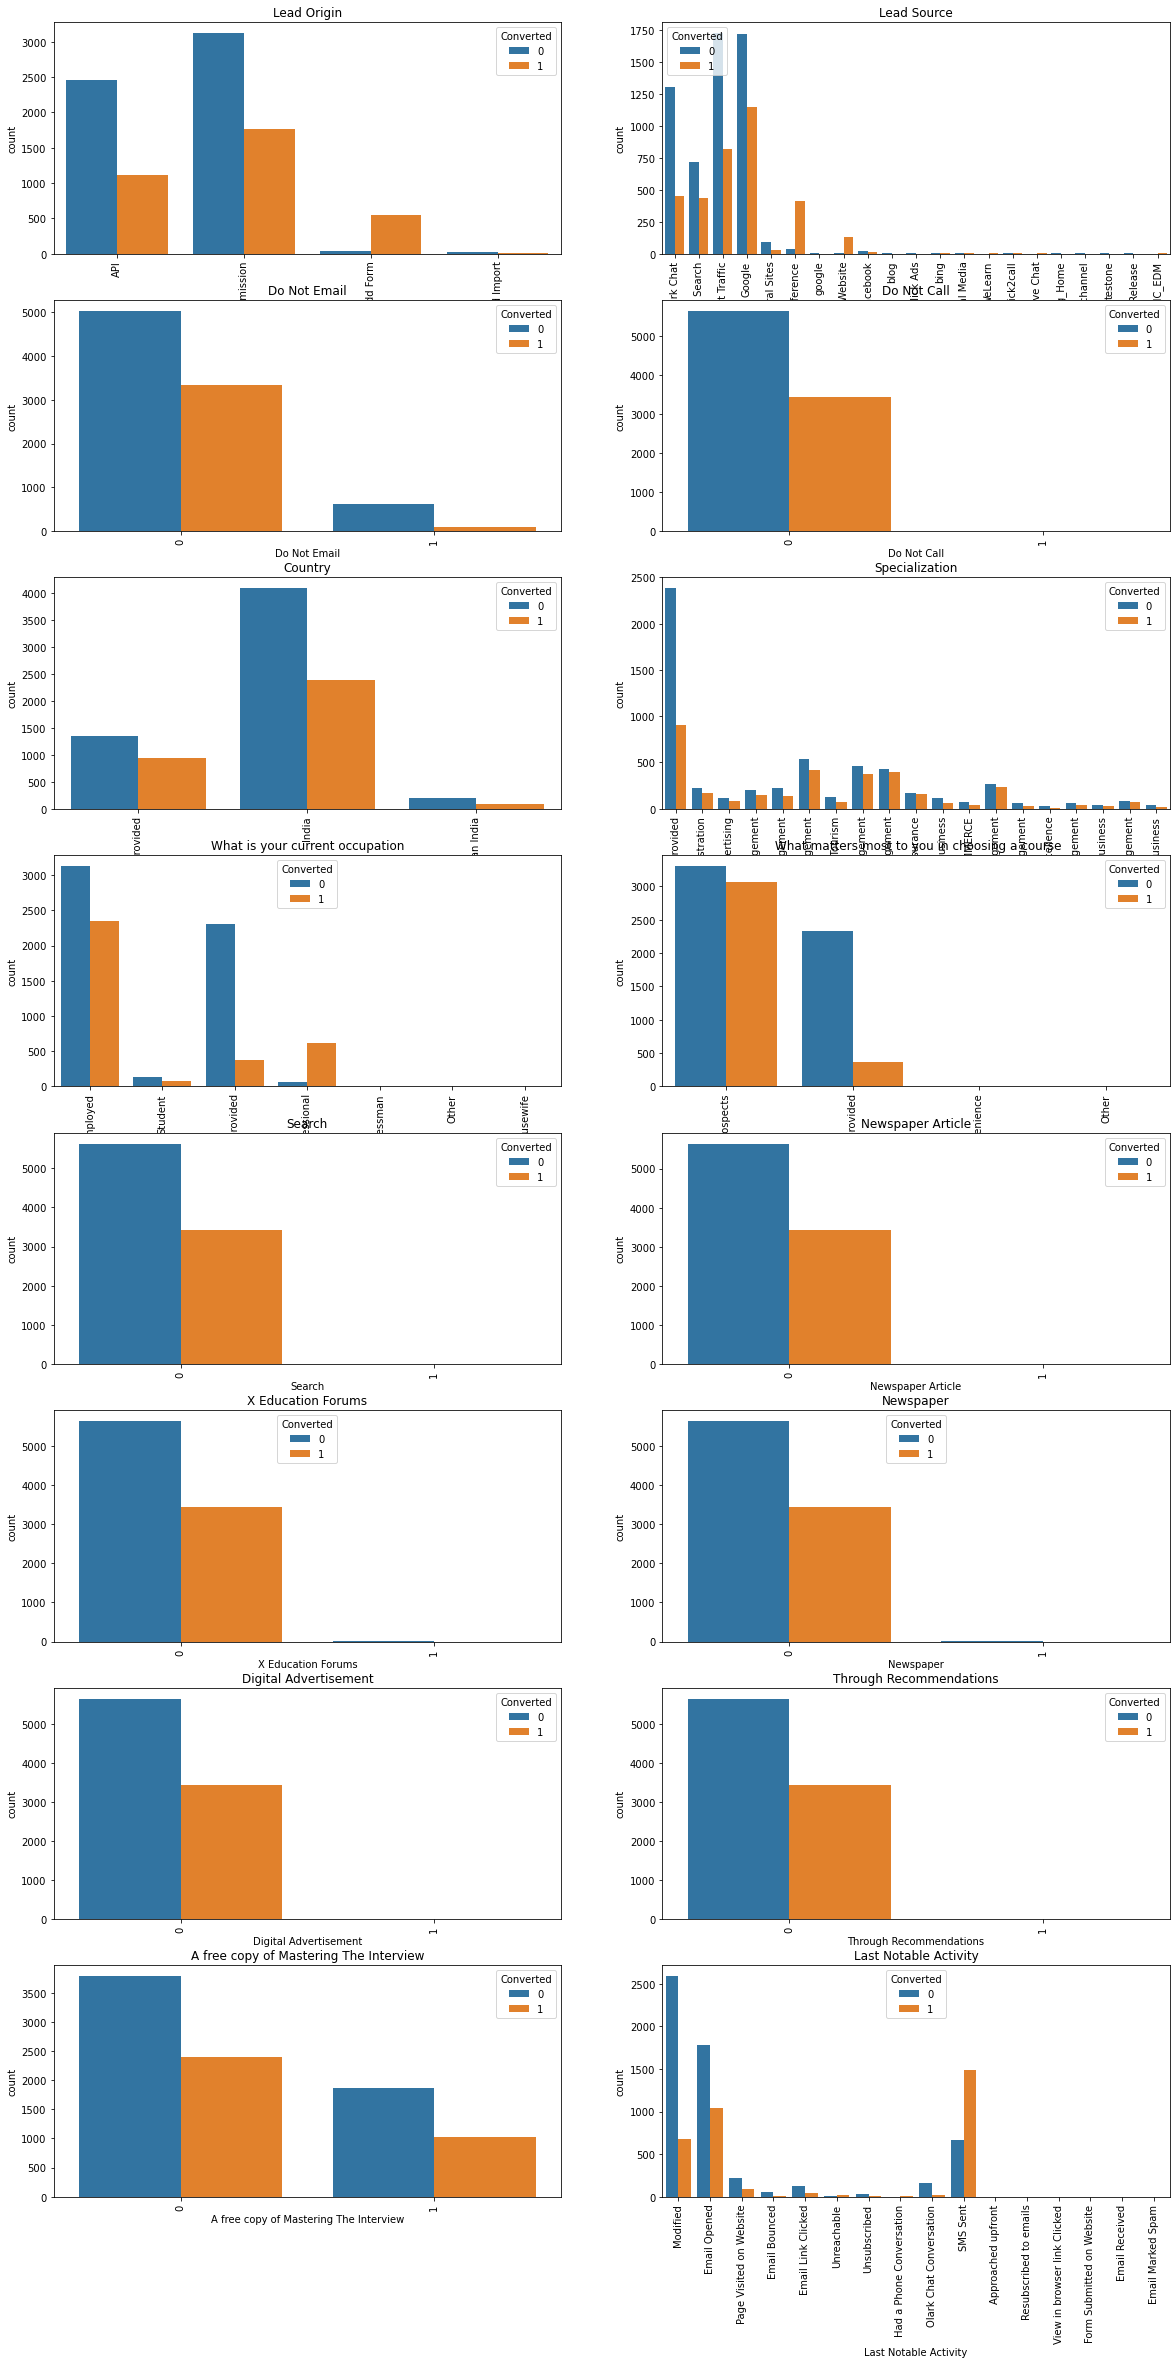

In [255]:

plt.figure(figsize = (20,40))

plt.subplot(8,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(8,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(8,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(8,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.subplot(8,2,5)
sns.countplot(x='Country', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(8,2,6)
sns.countplot(x='Specialization', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(8,2,7)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(8,2,8)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title(' What matters most to you in choosing a course')
plt.subplot(8,2,9)
sns.countplot(x='Search', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(8,2,10)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(8,2,11)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(8,2,12)
sns.countplot(x='Newspaper', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')
plt.subplot(8,2,13)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(8,2,14)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')
plt.subplot(8,2,15)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(8,2,16)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

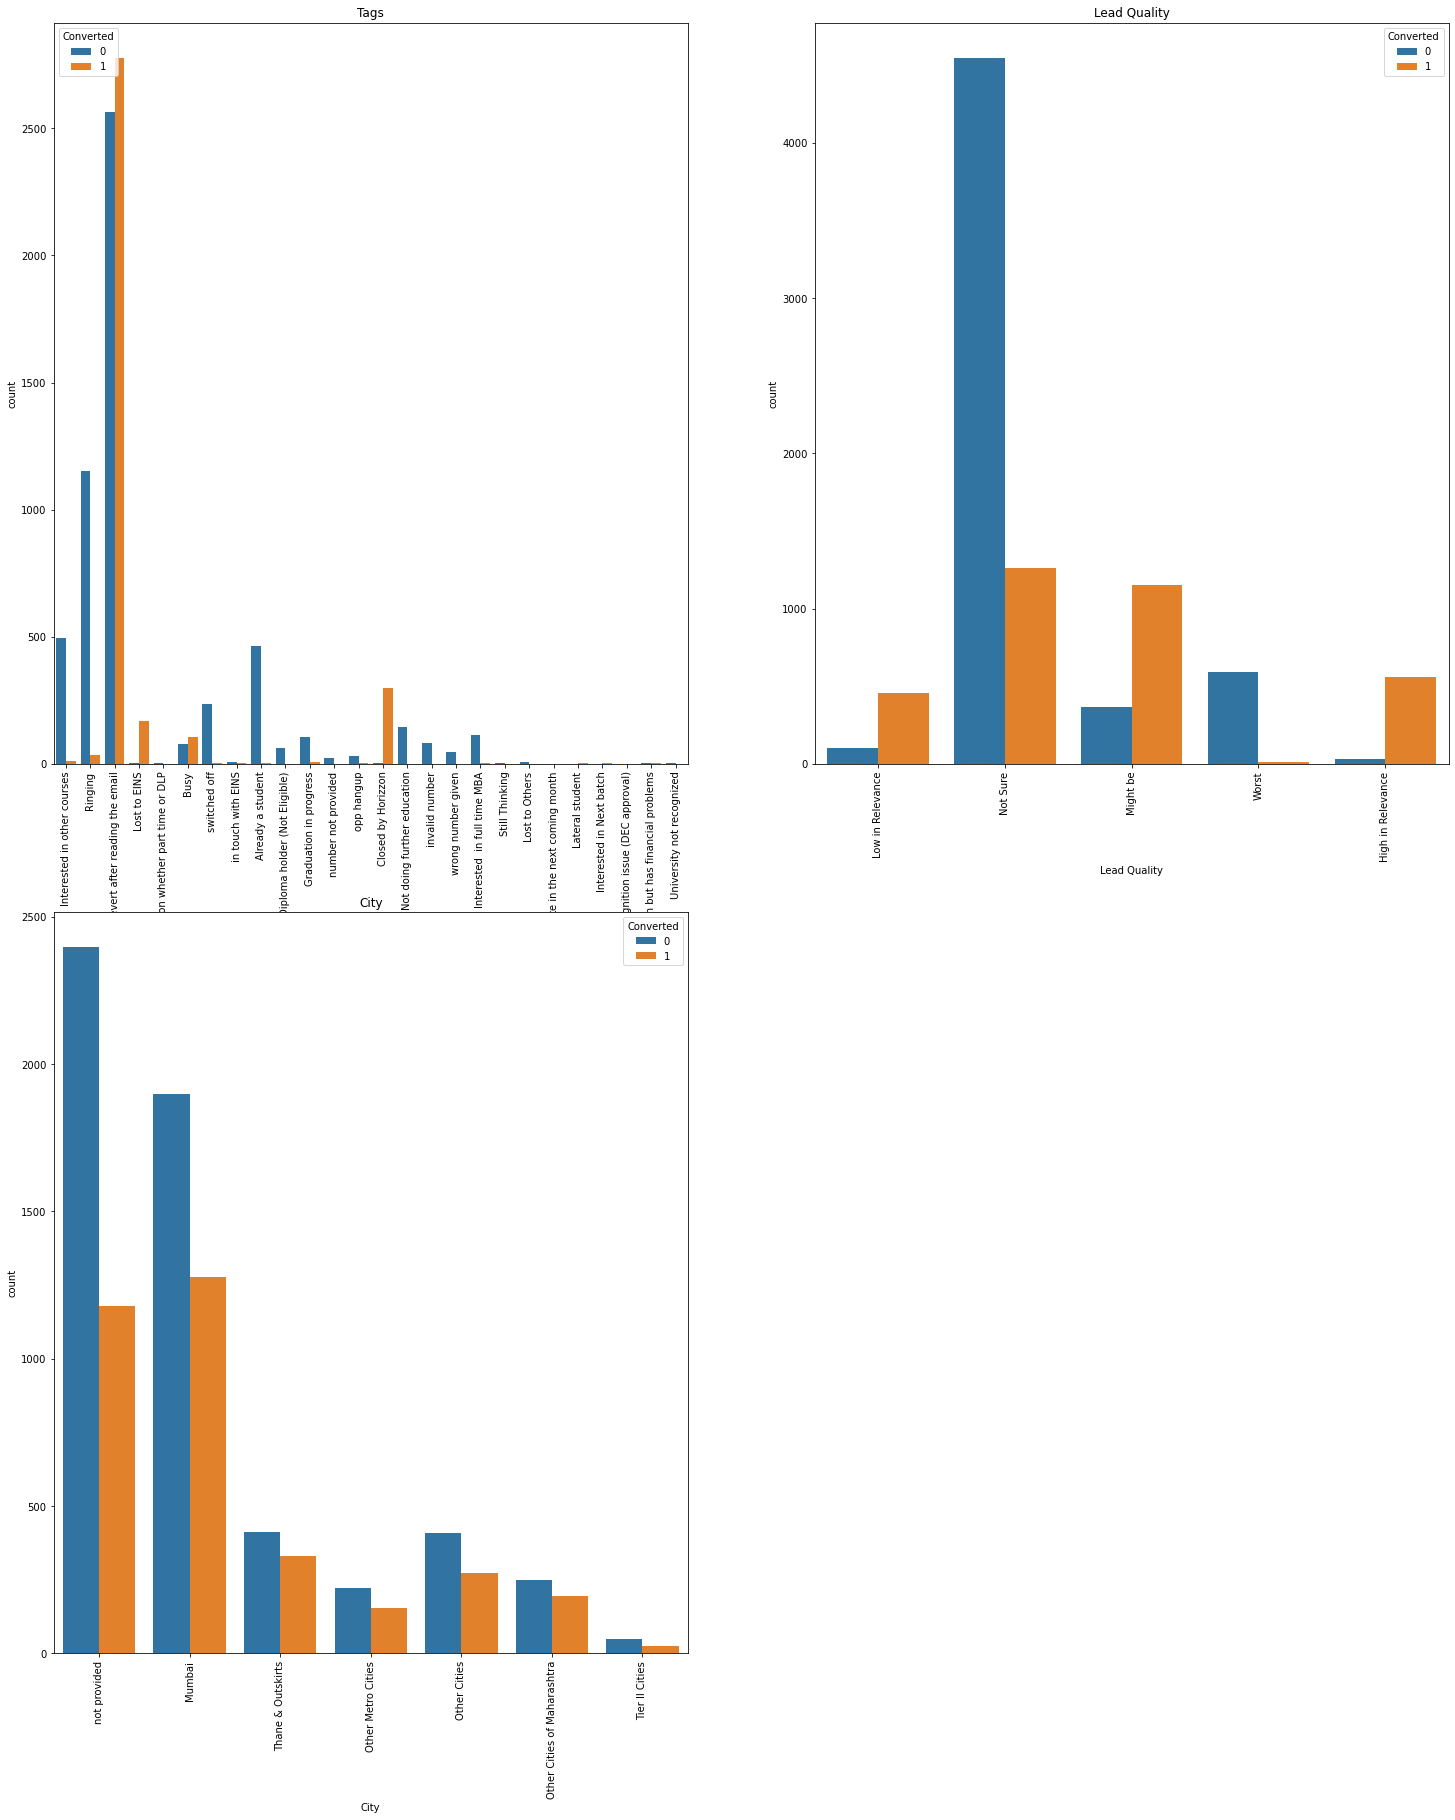

In [256]:
plt.figure(figsize = (25,30))

plt.subplot(2,2,1)
sns.countplot(x='Tags', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Tags')

plt.subplot(2,2,2)
sns.countplot(x='Lead Quality', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Quality')

plt.subplot(2,2,3)
sns.countplot(x='City', hue='Converted', data= lead_df_final).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.show()

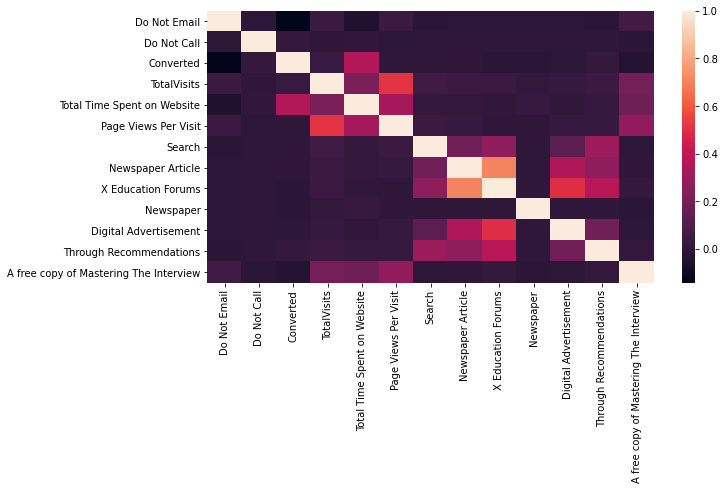

In [257]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_df_final.corr())
plt.show()

* We can see that Converted and Do Not Email hai high negative correlation

In [258]:
numeric = lead_df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


## DUMMY VARIABLES

In [261]:
lead_df_final['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
not provided                 2702
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [262]:
lead_df_final['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [263]:
lead_df_final['Lead Quality'].value_counts()

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [264]:
lead_df_final['City'].value_counts()

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [265]:
lead_df_final['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [266]:
lead_df_final['Specialization'].value_counts()

not provided                         3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [267]:
lead_df_final['Country'].value_counts()

India               6491
not provided        2296
other than India     287
Name: Country, dtype: int64

In [268]:
lead_df_final['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [269]:
lead_df_final['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [270]:
lead_df_final['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [271]:
# we use the get dummies feature of pandas to create dummy variables
lead_dummies = pd.get_dummies(lead_df_final[['Lead Origin','Country','Specialization' ,'Lead Source', 'Last Activity', 'What is your current occupation','What matters most to you in choosing a course', 'Last Notable Activity','Lead Quality']], drop_first=True)

In [272]:
lead_final_dummies = pd.concat([lead_df_final, lead_dummies], axis=1)
lead_final_dummies.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_not provided,Country_other than India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,Low in Relevance,not provided,0,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,not provided,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Not Sure,not provided,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [274]:
lead_final_dummies = lead_final_dummies.drop(['What matters most to you in choosing a course_not provided','What is your current occupation_not provided','Lead Origin', 'Lead Source','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity','Tags','City','Country_not provided','Lead Quality'],axis = 1)


In [276]:
lead_final_dummies.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Country_other than India',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specializatio

## Test Train SPLIT

We split the data into 70% training data and 30% test data

In [277]:
X = lead_final_dummies.drop(['Converted'],axis = 1)

In [278]:
y = lead_final_dummies['Converted']

In [279]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_other than India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [280]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Numeric features

We are using the Standard Scaler to Rescale the numeric fetures

In [283]:
scaler = StandardScaler()

In [284]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [285]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_other than India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [286]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_other than India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
count,6351.000000,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351

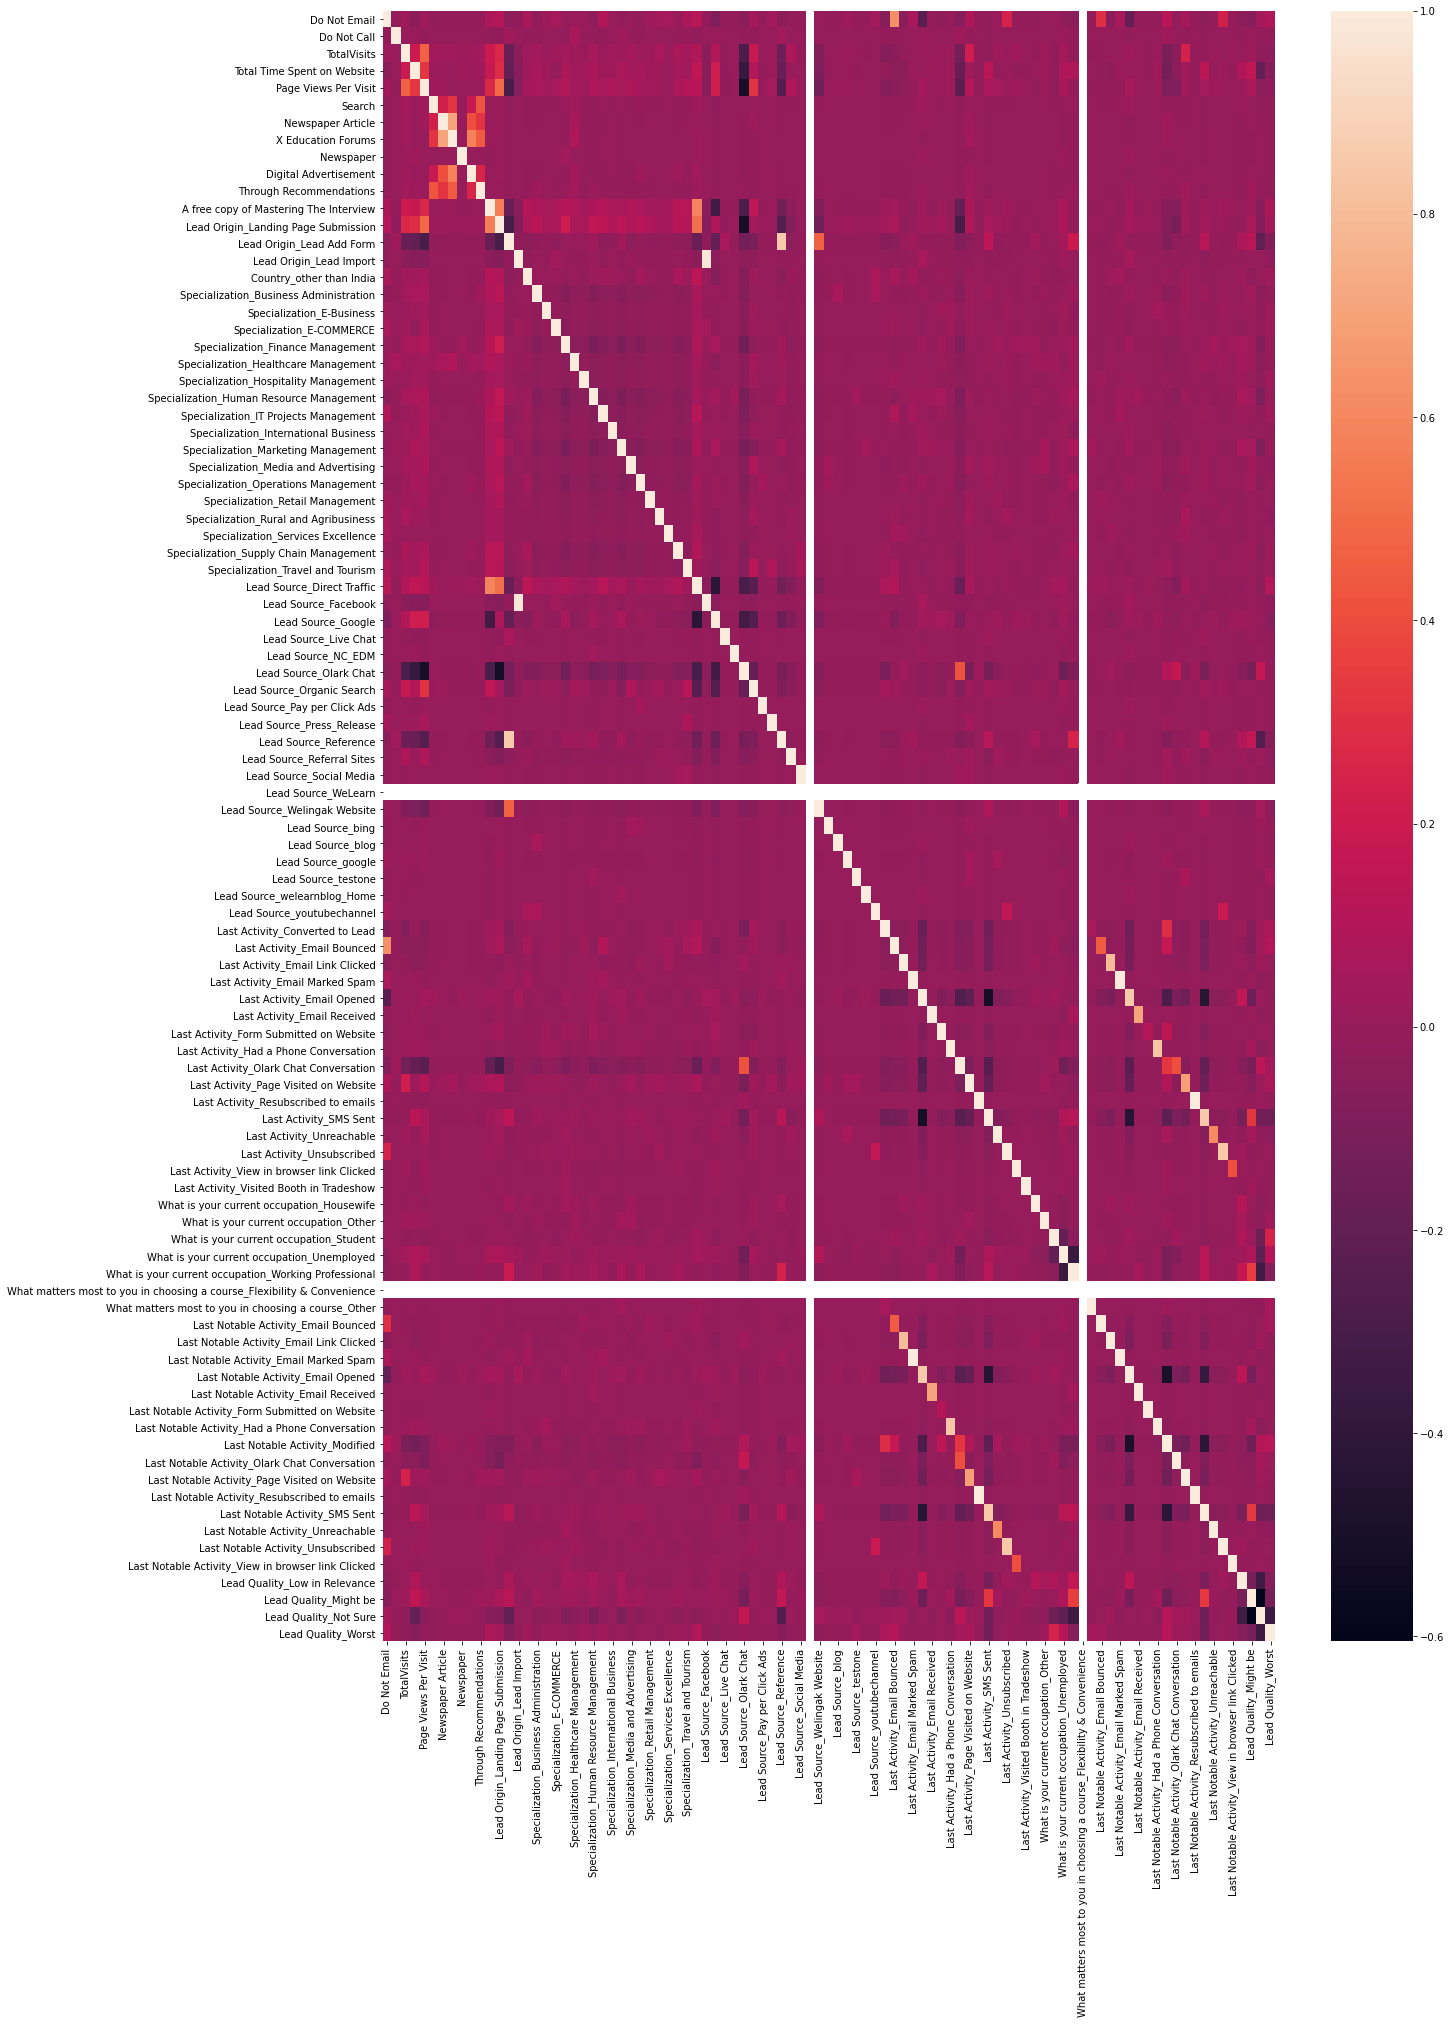

In [287]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [288]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [289]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [291]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Search', False, 9),
 ('Newspaper Article', False, 26),
 ('X Education Forums', False, 53),
 ('Newspaper', False, 10),
 ('Digital Advertisement', False, 63),
 ('Through Recommendations', False, 47),
 ('A free copy of Mastering The Interview', False, 65),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Country_other than India', False, 69),
 ('Specialization_Business Administration', False, 68),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_Finance Management', False, 56),
 ('Specialization_Healthcare Management', False, 74),
 ('Specialization_Hospitality Management', False, 40),
 ('Specialization_Human Resource Management', False, 67),
 ('Specialization_IT Projects Management',

In [292]:
col = X_train.columns[rfe.support_]

In [293]:
X_train = X_train[col]

In [294]:
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3009,0,0,-0.160255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.540048,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9226,0,0,-0.888650,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4750,0,0,1.643304,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7987,0,0,2.017593,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [295]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [296]:
X_train_sm = sm.add_constant(X_train)

In [297]:
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_res = log.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2125.7
Date:                Fri, 12 Nov 2021   Deviance:                       4251.4
Time:                        22:39:49   Pearson chi2:                 6.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2255      0.245      9.094      0.000       1.746       2.705
Do Not Email                                            -1.3838      0.194     -7.123      0.000      -1.765      -1.003
Do Not Call                                             22.9908   3.32e+04      0.001      0.999   -6.51e+04    6.51e+04
Total Time Spent on Website                              1.1045      0.045     24.307      0.000       1.015       1.194
Lead Origin_Lead Add Form                                2.5940      0.247     10.503      0.000       2.110       3.078
Lead Source_Olark Chat                                   1.5822      0.119     13.259      0.000       1.348       1.816
Lead Source_Welingak Website                             3.7937      0.762      4.980      0.000       2.301       5.287
Last Activity_Had a Phone Conversation                   1.9034      0.918      2.074      0.038       0.105       3.702
Last Activity_Olark Chat Conversation                   -0.7032      0.215     -3.274      0.001      -1.124      -0.282
Last Activity_SMS Sent                                   1.2414      0.087     14.280      0.000       1.071       1.412
What is your current occupation_Housewife               21.1047   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
What is your current occupation_Working Professional     1.8330      0.220      8.336      0.000       1.402       2.264
Last Notable Activity_Email Link Clicked                -0.4223      0.284     -1.488      0.137      -0.978       0.134
Last Notable Activity_Modified                          -0.9262      0.096     -9.632      0.000      -1.115      -0.738
Last Notable Activity_Olark Chat Conversation           -0.5434      0.395     -1.377      0.168      -1.317       0.230
Last Notable Activity_Page Visited on Website           -0.1631      0.233     -0.699      0.485      -0.621       0.294
Last Notable Activity_Unreachable                        1.4113      0.553      2.554      0.011       0.328       2.494
Lead Quality_Low in Relevance                           -1.3604      0.285     -4.767      0.000      -1.920      -0.801
Lead Quality_Might be                                   -2.3202      0.258     -8.999      0.000      -2.825      -1.815
Lead Quality_Not Sure                                   -4.0643      0.247    -16.444      0.000      -4.549      -3.580
Lead Quality_Worst                                      -6.1981      0.447    -13.878      0.000      -7.073      -5.323
========================================================================================================================
"""

In [298]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [299]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Lead Quality_Not Sure,2.34
12,Last Notable Activity_Modified,2.06
7,Last Activity_Olark Chat Conversation,1.93
8,Last Activity_SMS Sent,1.80
17,Lead Quality_Might be,1.75
4,Lead Source_Olark Chat,1.73
3,Lead Origin_Lead Add Form,1.62
5,Lead Source_Welingak Website,1.36
10,What is your current occupation_Working Profes...,1.35
13,Last Notable Activity_Olark Chat Conversation,1.33


In [300]:
X_train.drop('Do Not Call', axis = 1, inplace = True)

In [301]:
X_train_sm = sm.add_constant(X_train)

In [302]:
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_res = log.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2127.6
Date:                Fri, 12 Nov 2021   Deviance:                       4255.1
Time:                        22:39:50   Pearson chi2:                 6.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2209      0.245      9.076      0.000       1.741       2.701
Do Not Email                                            -1.3860      0.194     -7.132      0.000      -1.767      -1.005
Total Time Spent on Website                              1.1060      0.045     24.346      0.000       1.017       1.195
Lead Origin_Lead Add Form                                2.6246      0.247     10.625      0.000       2.140       3.109
Lead Source_Olark Chat                                   1.5804      0.119     13.249      0.000       1.347       1.814
Lead Source_Welingak Website                             3.7639      0.762      4.941      0.000       2.271       5.257
Last Activity_Had a Phone Conversation                   1.9008      0.918      2.071      0.038       0.102       3.699
Last Activity_Olark Chat Conversation                   -0.6880      0.213     -3.231      0.001      -1.105      -0.271
Last Activity_SMS Sent                                   1.2385      0.087     14.249      0.000       1.068       1.409
What is your current occupation_Housewife               21.0984   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
What is your current occupation_Working Professional     1.8291      0.220      8.317      0.000       1.398       2.260
Last Notable Activity_Email Link Clicked                -0.4227      0.284     -1.489      0.136      -0.979       0.134
Last Notable Activity_Modified                          -0.9220      0.096     -9.594      0.000      -1.110      -0.734
Last Notable Activity_Olark Chat Conversation           -0.5584      0.394     -1.418      0.156      -1.330       0.213
Last Notable Activity_Page Visited on Website           -0.1640      0.234     -0.702      0.483      -0.622       0.294
Last Notable Activity_Unreachable                        1.4113      0.553      2.554      0.011       0.328       2.494
Lead Quality_Low in Relevance                           -1.3595      0.285     -4.763      0.000      -1.919      -0.800
Lead Quality_Might be                                   -2.3125      0.258     -8.971      0.000      -2.818      -1.807
Lead Quality_Not Sure                                   -4.0591      0.247    -16.425      0.000      -4.543      -3.575
Lead Quality_Worst                                      -6.1958      0.447    -13.874      0.000      -7.071      -5.321
========================================================================================================================
"""

In [303]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Lead Quality_Not Sure,2.34
11,Last Notable Activity_Modified,2.06
6,Last Activity_Olark Chat Conversation,1.93
7,Last Activity_SMS Sent,1.80
16,Lead Quality_Might be,1.75
3,Lead Source_Olark Chat,1.73
2,Lead Origin_Lead Add Form,1.62
4,Lead Source_Welingak Website,1.36
9,What is your current occupation_Working Profes...,1.35
12,Last Notable Activity_Olark Chat Conversation,1.33


In [304]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [305]:
X_train_sm = sm.add_constant(X_train)

In [306]:
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_res = log.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2129.0
Date:                Fri, 12 Nov 2021   Deviance:                       4258.1
Time:                        22:39:50   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2206      0.245      9.075      0.000       1.741       2.700
Do Not Email                                            -1.3882      0.194     -7.138      0.000      -1.769      -1.007
Total Time Spent on Website                              1.1053      0.045     24.343      0.000       1.016       1.194
Lead Origin_Lead Add Form                                2.6445      0.246     10.740      0.000       2.162       3.127
Lead Source_Olark Chat                                   1.5782      0.119     13.233      0.000       1.344       1.812
Lead Source_Welingak Website                             3.7435      0.762      4.915      0.000       2.251       5.236
Last Activity_Had a Phone Conversation                   1.8998      0.918      2.070      0.038       0.101       3.699
Last Activity_Olark Chat Conversation                   -0.6875      0.213     -3.227      0.001      -1.105      -0.270
Last Activity_SMS Sent                                   1.2367      0.087     14.230      0.000       1.066       1.407
What is your current occupation_Working Professional     1.8221      0.220      8.281      0.000       1.391       2.253
Last Notable Activity_Email Link Clicked                -0.4170      0.283     -1.476      0.140      -0.971       0.137
Last Notable Activity_Modified                          -0.9248      0.096     -9.624      0.000      -1.113      -0.736
Last Notable Activity_Olark Chat Conversation           -0.5597      0.394     -1.421      0.155      -1.332       0.212
Last Notable Activity_Page Visited on Website           -0.1658      0.234     -0.710      0.478      -0.624       0.292
Last Notable Activity_Unreachable                        1.4093      0.553      2.550      0.011       0.326       2.492
Lead Quality_Low in Relevance                           -1.3335      0.285     -4.677      0.000      -1.892      -0.775
Lead Quality_Might be                                   -2.3091      0.258     -8.959      0.000      -2.814      -1.804
Lead Quality_Not Sure                                   -4.0568      0.247    -16.416      0.000      -4.541      -3.572
Lead Quality_Worst                                      -6.1931      0.447    -13.869      0.000      -7.068      -5.318
========================================================================================================================
"""

In [307]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Lead Quality_Not Sure,2.34
10,Last Notable Activity_Modified,2.05
6,Last Activity_Olark Chat Conversation,1.93
7,Last Activity_SMS Sent,1.80
15,Lead Quality_Might be,1.75
3,Lead Source_Olark Chat,1.73
2,Lead Origin_Lead Add Form,1.61
4,Lead Source_Welingak Website,1.36
8,What is your current occupation_Working Profes...,1.35
11,Last Notable Activity_Olark Chat Conversation,1.33


In [308]:
X_train.drop('Last Notable Activity_Page Visited on Website', axis = 1, inplace = True)

In [309]:
X_train_sm = sm.add_constant(X_train)

In [310]:
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_res = log.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2129.3
Date:                Fri, 12 Nov 2021   Deviance:                       4258.6
Time:                        22:39:50   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2097      0.244      9.046      0.000       1.731       2.688
Do Not Email                                            -1.3929      0.194     -7.172      0.000      -1.774      -1.012
Total Time Spent on Website                              1.1047      0.045     24.339      0.000       1.016       1.194
Lead Origin_Lead Add Form                                2.6477      0.246     10.750      0.000       2.165       3.130
Lead Source_Olark Chat                                   1.5807      0.119     13.256      0.000       1.347       1.814
Lead Source_Welingak Website                             3.7431      0.762      4.914      0.000       2.250       5.236
Last Activity_Had a Phone Conversation                   1.9094      0.918      2.081      0.037       0.111       3.708
Last Activity_Olark Chat Conversation                   -0.6852      0.213     -3.216      0.001      -1.103      -0.268
Last Activity_SMS Sent                                   1.2474      0.086     14.567      0.000       1.080       1.415
What is your current occupation_Working Professional     1.8218      0.220      8.278      0.000       1.390       2.253
Last Notable Activity_Email Link Clicked                -0.4054      0.282     -1.437      0.151      -0.958       0.147
Last Notable Activity_Modified                          -0.9165      0.095     -9.604      0.000      -1.103      -0.729
Last Notable Activity_Olark Chat Conversation           -0.5508      0.394     -1.399      0.162      -1.322       0.221
Last Notable Activity_Unreachable                        1.4215      0.552      2.573      0.010       0.339       2.504
Lead Quality_Low in Relevance                           -1.3300      0.285     -4.664      0.000      -1.889      -0.771
Lead Quality_Might be                                   -2.3102      0.258     -8.960      0.000      -2.816      -1.805
Lead Quality_Not Sure                                   -4.0588      0.247    -16.420      0.000      -4.543      -3.574
Lead Quality_Worst                                      -6.2002      0.447    -13.886      0.000      -7.075      -5.325
========================================================================================================================
"""

In [311]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Lead Quality_Not Sure,2.19
10,Last Notable Activity_Modified,2.00
6,Last Activity_Olark Chat Conversation,1.93
7,Last Activity_SMS Sent,1.76
3,Lead Source_Olark Chat,1.73
14,Lead Quality_Might be,1.72
2,Lead Origin_Lead Add Form,1.61
4,Lead Source_Welingak Website,1.36
8,What is your current occupation_Working Profes...,1.35
11,Last Notable Activity_Olark Chat Conversation,1.33


In [312]:
X_train.drop('Last Notable Activity_Olark Chat Conversation', axis = 1, inplace = True)

In [313]:
X_train_sm = sm.add_constant(X_train)

In [314]:
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_res = log.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2130.3
Date:                Fri, 12 Nov 2021   Deviance:                       4260.6
Time:                        22:39:50   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2053      0.244      9.031      0.000       1.727       2.684
Do Not Email                                            -1.3971      0.194     -7.209      0.000      -1.777      -1.017
Total Time Spent on Website                              1.1014      0.045     24.307      0.000       1.013       1.190
Lead Origin_Lead Add Form                                2.6444      0.246     10.729      0.000       2.161       3.127
Lead Source_Olark Chat                                   1.5769      0.119     13.226      0.000       1.343       1.811
Lead Source_Welingak Website                             3.7259      0.761      4.895      0.000       2.234       5.218
Last Activity_Had a Phone Conversation                   1.9054      0.916      2.080      0.038       0.110       3.701
Last Activity_Olark Chat Conversation                   -0.8477      0.185     -4.594      0.000      -1.209      -0.486
Last Activity_SMS Sent                                   1.2497      0.086     14.609      0.000       1.082       1.417
What is your current occupation_Working Professional     1.8244      0.220      8.289      0.000       1.393       2.256
Last Notable Activity_Email Link Clicked                -0.3959      0.282     -1.404      0.160      -0.949       0.157
Last Notable Activity_Modified                          -0.8824      0.092     -9.593      0.000      -1.063      -0.702
Last Notable Activity_Unreachable                        1.4292      0.552      2.588      0.010       0.347       2.512
Lead Quality_Low in Relevance                           -1.3341      0.285     -4.680      0.000      -1.893      -0.775
Lead Quality_Might be                                   -2.3143      0.258     -8.979      0.000      -2.820      -1.809
Lead Quality_Not Sure                                   -4.0625      0.247    -16.440      0.000      -4.547      -3.578
Lead Quality_Worst                                      -6.2030      0.446    -13.899      0.000      -7.078      -5.328
========================================================================================================================
"""

In [315]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead Quality_Not Sure,2.15
10,Last Notable Activity_Modified,1.84
7,Last Activity_SMS Sent,1.76
3,Lead Source_Olark Chat,1.73
13,Lead Quality_Might be,1.72
2,Lead Origin_Lead Add Form,1.61
6,Last Activity_Olark Chat Conversation,1.57
4,Lead Source_Welingak Website,1.36
8,What is your current occupation_Working Profes...,1.35
1,Total Time Spent on Website,1.32


In [316]:
X_train.drop('Last Notable Activity_Email Link Clicked', axis = 1, inplace = True)

In [317]:
X_train_sm = sm.add_constant(X_train)

In [318]:
log = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
log_res = log.fit()
log_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2131.3
Date:                Fri, 12 Nov 2021   Deviance:                       4262.7
Time:                        22:39:50   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1934      0.244      8.988      0.000       1.715       2.672
Do Not Email                                            -1.3909      0.194     -7.176      0.000      -1.771      -1.011
Total Time Spent on Website                              1.1012      0.045     24.314      0.000       1.012       1.190
Lead Origin_Lead Add Form                                2.6439      0.247     10.720      0.000       2.160       3.127
Lead Source_Olark Chat                                   1.5673      0.119     13.181      0.000       1.334       1.800
Lead Source_Welingak Website                             3.7249      0.761      4.894      0.000       2.233       5.217
Last Activity_Had a Phone Conversation                   1.9189      0.916      2.096      0.036       0.125       3.713
Last Activity_Olark Chat Conversation                   -0.8322      0.184     -4.516      0.000      -1.193      -0.471
Last Activity_SMS Sent                                   1.2662      0.085     14.928      0.000       1.100       1.432
What is your current occupation_Working Professional     1.8245      0.220      8.285      0.000       1.393       2.256
Last Notable Activity_Modified                          -0.8710      0.092     -9.498      0.000      -1.051      -0.691
Last Notable Activity_Unreachable                        1.4479      0.552      2.622      0.009       0.366       2.530
Lead Quality_Low in Relevance                           -1.3342      0.285     -4.681      0.000      -1.893      -0.776
Lead Quality_Might be                                   -2.3216      0.258     -9.007      0.000      -2.827      -1.816
Lead Quality_Not Sure                                   -4.0680      0.247    -16.462      0.000      -4.552      -3.584
Lead Quality_Worst                                      -6.2039      0.446    -13.906      0.000      -7.078      -5.329
========================================================================================================================
"""

In [319]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Quality_Not Sure,2.09
9,Last Notable Activity_Modified,1.82
7,Last Activity_SMS Sent,1.74
3,Lead Source_Olark Chat,1.72
12,Lead Quality_Might be,1.70
2,Lead Origin_Lead Add Form,1.61
6,Last Activity_Olark Chat Conversation,1.56
4,Lead Source_Welingak Website,1.36
8,What is your current occupation_Working Profes...,1.35
1,Total Time Spent on Website,1.32


In [320]:
y_train_pred = log_res.predict(X_train_sm)

In [321]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prrob':y_train_pred})

In [322]:
y_train_pred_final.head()

,Converted,Converted_Prrob
3009,0,0.113946
1012,0,0.115510
9226,0,0.290975
4750,1,0.768761
7987,1,0.677553


In [323]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prrob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prrob,predicted
3009,0,0.113946,0
1012,0,0.115510,0
9226,0,0.290975,0
4750,1,0.768761,1
7987,1,0.677553,1


In [324]:
from sklearn import metrics

In [325]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3545  360]
 [ 607 1839]]


In [326]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [327]:
#Accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print(Accuracy)

0.8477405133049913


In [328]:
#Sensitivity
Sensitivity = TP/(TP+FN)
print(TP/(TP+FN))

0.7518397383483238


In [329]:
#Specificity
Speci = TN/(TN+FP)
print(Speci)

0.9078104993597952


In [330]:
#False positive rate
FPR = FP/(TN+FP)
print(FPR)

0.09218950064020487


In [331]:
#Positive Predictive rate
PPR = TP/float(TP+FP)
print(PPR)

0.8362892223738063


In [332]:
#False Predictive Power
FPR = TN/float(TN+FN)
print(FPR)

0.8538053949903661


In [333]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [334]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prrob, drop_intermediate = False )

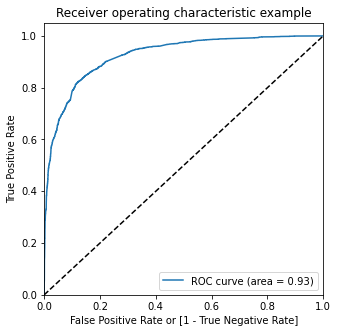

In [335]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prrob)

In [336]:
# Let's create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prrob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prrob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.113946,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.115510,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.290975,0,1,1,1,0,0,0,0,0,0,0
4750,1,0.768761,1,1,1,1,1,1,1,1,1,0,0
7987,1,0.677553,1,1,1,1,1,1,1,1,0,0,0


In [337]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix



num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.715006  0.967294  0.556978
0.2   0.2  0.794521  0.928455  0.710627
0.3   0.3  0.842387  0.863859  0.828937
0.4   0.4  0.855456  0.825429  0.874264
0.5   0.5  0.847741  0.751840  0.907810
0.6   0.6  0.844749  0.708504  0.930090
0.7   0.7  0.833097  0.639002  0.954673
0.8   0.8  0.819713  0.572772  0.974392
0.9   0.9  0.778775  0.446443  0.986940


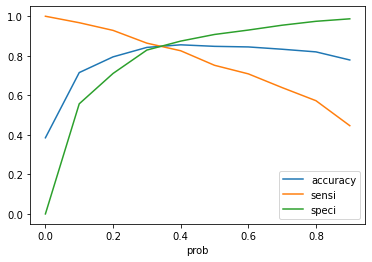

In [338]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [339]:
y_train_pred_final = y_train_pred_final[['Converted','Converted_Prrob']]

In [340]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prrob.map(lambda x: 1 if x > 0.35 else 0)

In [341]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3341  564]
 [ 383 2063]]


In [342]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [343]:
#Accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print(Accuracy)

0.85088962368131


In [344]:
#Sensitivity
Sensitivity = TP/(TP+FN)
print(TP/(TP+FN))

0.8434178250204415


In [345]:
#Specificity
Speci = TN/(TN+FP)
print(Speci)

0.8555697823303458


In [346]:
#False positive rate
FPR = FP/(TN+FP)
print(FPR)

0.14443021766965428


In [347]:
#Positive Predictive rate
PPR = TP/float(TP+FP)
print(PPR)

0.7853064331937571


In [348]:
#False Predictive Power
FPR = TN/float(TN+FN)
print(FPR)

0.8971535982814178


In [349]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7853064331937571

In [350]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8434178250204415

## PREDICTION

In [351]:

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [352]:
col = X_train.columns

In [353]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,0,1.887326,0,0,0,0,0,0,1,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,0,-0.888650,1,0,0,0,0,0,0,1,0,1,0,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,0,1,0


In [354]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst
3271,1.0,0,-0.600595,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,1.0,0,1.887326,0,0,0,0,0,0,1,0,0,1,0,0,0
7936,1.0,0,-0.752879,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,1.0,0,-0.888650,1,0,0,0,0,0,0,1,0,1,0,0,0
3830,1.0,0,-0.587751,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0.632357,0,0,0,0,0,0,0,1,0,0,0,1,0
2879,1.0,0,0.192017,0,0,0,0,0,0,0,1,0,0,0,1,0
6501,1.0,0,1.560740,0,0,0,0,0,1,0,0,0,0,1,0,0
7155,1.0,0,0.056246,0,0,0,0,0,0,0,1,0,0,0,1,0


In [355]:
y_test_pred = log_res.predict(X_test_sm)

In [356]:
y_pred = pd.DataFrame(y_test)

In [357]:
y_pred['Converted_Test'] = y_test_pred

In [358]:
y_pred.head()

,Converted,Converted_Test
3271,0,0.073374
1490,1,0.991525
7936,0,0.062757
4216,1,0.839363
3830,0,0.074342


In [359]:
y_pred['predicted'] = y_pred.Converted_Test.map(lambda x: 1 if x > 0.35 else 0)

In [360]:
y_pred.head()

,Converted,Converted_Test,predicted
3271,0,0.073374,0
1490,1,0.991525,1
7936,0,0.062757,0
4216,1,0.839363,1
3830,0,0.074342,0


In [361]:
metrics.accuracy_score(y_pred.Converted, y_pred.predicted)

0.8409842085934631

In [362]:
confusion2 = metrics.confusion_matrix(y_pred.Converted, y_pred.predicted )
confusion2

array([[1476,  258],
       [ 175,  814]], dtype=int64)

In [363]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [364]:
#Sensitivity
Sensitivity = TP/(TP+FN)
print(TP/(TP+FN))

0.8230535894843276


In [365]:
#Specificity
Speci = TN/(TN+FP)
print(Speci)

0.8512110726643599


## PRECISION AND RECALL

In [366]:
#Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7593283582089553

In [367]:
#Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8230535894843276

## PRECISION AND RECALL TRADEOFF

In [368]:
from sklearn.metrics import precision_recall_curve

In [369]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prrob)

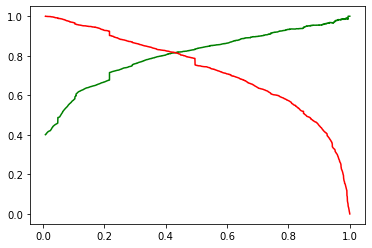

In [370]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [371]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prrob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_Prrob,predicted,final_predicted
3009,0,0.113946,0,0
1012,0,0.115510,0,0
9226,0,0.290975,0,0
4750,1,0.768761,1,1
7987,1,0.677553,1,1


In [372]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8575027554715793

In [373]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3434,  471],
       [ 434, 2012]], dtype=int64)

In [374]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [375]:
#Precision
TP/(FP+TP)

0.8103101087394281

In [376]:
#Recall
TP/(FN+TP)

0.8225674570727719

## PREDICTION ON TEST SET

In [377]:
y_test_pred = log_res.predict(X_test_sm)

In [378]:
y_pred = pd.DataFrame(y_test)

In [379]:
y_pred['Converted_Test'] = y_test_pred

In [380]:
y_pred.head()

,Converted,Converted_Test
3271,0,0.073374
1490,1,0.991525
7936,0,0.062757
4216,1,0.839363
3830,0,0.074342


In [381]:
y_pred['final_predicted'] = y_pred.Converted_Test.map(lambda x: 1 if x > 0.41 else 0)
y_pred.head()

,Converted,Converted_Test,final_predicted
3271,0,0.073374,0
1490,1,0.991525,1
7936,0,0.062757,0
4216,1,0.839363,1
3830,0,0.074342,0


In [382]:
# Accuracy
metrics.accuracy_score(y_pred.Converted, y_pred.final_predicted)

0.8457583547557841

In [383]:
confusion2 = metrics.confusion_matrix(y_pred.Converted, y_pred.final_predicted )
confusion2

array([[1511,  223],
       [ 197,  792]], dtype=int64)

In [384]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [385]:
#Precision
TP/(FP+TP)

0.780295566502463

In [386]:
#Recall
TP/(FN+TP)

0.8008088978766431

In [387]:
#Specificity
TN/(TN+FP)

0.8713956170703575